# **Balancing**

In [1]:
!pip install pandas psycopg2-binary mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 33.3 MB/s eta 0:00:00


In [5]:
import pandas as pd
import psycopg2
import mysql.connector
import os

try:
    # --- Langkah 1: Hubungkan ke Database dan Muat Data ---
    print("Menghubungkan ke database Anda...")

    # Koneksi ke PostgreSQL (sepal data)
    conn_pg = psycopg2.connect(
        host="pg-21171808-postgresql21-170.c.aivencloud.com",
        database="defaultdb",
        user="avnadmin",
        password="AVNS_emxcRXd6pI6F-9XSrNU",
        port="13844"
    )
    data_sepal = pd.read_sql("SELECT * FROM sepal", conn_pg)
    conn_pg.close()
    print(f"✅ Berhasil memuat {len(data_sepal)} baris dari PostgreSQL.")

    # Koneksi ke MySQL (petal data)
    conn_mysql = mysql.connector.connect(
        host="mysql-2b4a76d5-mysql21-170.c.aivencloud.com",
        database="defaultdb",
        user="avnadmin",
        password="AVNS_0XEo8Lr33wvHuOHjVZq",
        port="14185"
    )
    data_petal = pd.read_sql("SELECT * FROM petal", conn_mysql)
    conn_mysql.close()
    print(f"✅ Berhasil memuat {len(data_petal)} baris dari MySQL.")

    # --- Langkah 2: Menggabungkan Dua DataFrame ---
    print("\nMenggabungkan data sepal dan petal...")

    # PERBAIKAN DI SINI: Menggabungkan hanya berdasarkan 'id'
    iris_gabungan = pd.merge(data_sepal, data_petal, on='id')

    print(f"Data berhasil digabungkan. Total baris: {len(iris_gabungan)}")

    # --- Langkah 3: Menghapus 35 Data Iris-setosa ---
    print("\nMenghapus 35 baris data Iris-setosa...")
    indeks_setosa = iris_gabungan[iris_gabungan['class'] == 'Iris-setosa'].index
    indeks_untuk_dihapus = indeks_setosa[:35]
    iris_final = iris_gabungan.drop(indeks_untuk_dihapus)
    print("Proses penghapusan selesai.")

    # --- Langkah 4: Verifikasi Hasil ---
    print("\n--- Verifikasi Hasil ---")
    jumlah_setosa_awal = len(iris_gabungan[iris_gabungan['class'] == 'Iris-setosa'])
    jumlah_setosa_akhir = len(iris_final[iris_final['class'] == 'Iris-setosa'])
    print(f"Jumlah total data sebelum dihapus: {len(iris_gabungan)} baris")
    print(f"Jumlah 'Iris-setosa' sebelum dihapus: {jumlah_setosa_awal} baris")
    print("-" * 25)
    print(f"Jumlah 'Iris-setosa' setelah dihapus: {jumlah_setosa_akhir} baris")
    print(f"Jumlah total data setelah dihapus: {len(iris_final)} baris")

    # --- Langkah 5: Simpan Hasil ke File CSV ---
    nama_file = "iris_final_from_db.csv"
    iris_final.to_csv(nama_file, index=False)
    print(f"\n✅ Data final telah disimpan ke file '{nama_file}'.")

except Exception as e:
    print(f"\n❌ Terjadi kesalahan: {e}")

Menghubungkan ke database Anda...


/tmp/ipython-input-299537429.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_sepal = pd.read_sql("SELECT * FROM sepal", conn_pg)


✅ Berhasil memuat 150 baris dari PostgreSQL.


/tmp/ipython-input-299537429.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_petal = pd.read_sql("SELECT * FROM petal", conn_mysql)


✅ Berhasil memuat 150 baris dari MySQL.

Menggabungkan data sepal dan petal...
Data berhasil digabungkan. Total baris: 150

Menghapus 35 baris data Iris-setosa...
Proses penghapusan selesai.

--- Verifikasi Hasil ---
Jumlah total data sebelum dihapus: 150 baris
Jumlah 'Iris-setosa' sebelum dihapus: 50 baris
-------------------------
Jumlah 'Iris-setosa' setelah dihapus: 15 baris
Jumlah total data setelah dihapus: 115 baris

✅ Data final telah disimpan ke file 'iris_final_from_db.csv'.


Persentase varians yang dijelaskan oleh PCA (dua komponen pertama): [0.8962252 0.0647599]


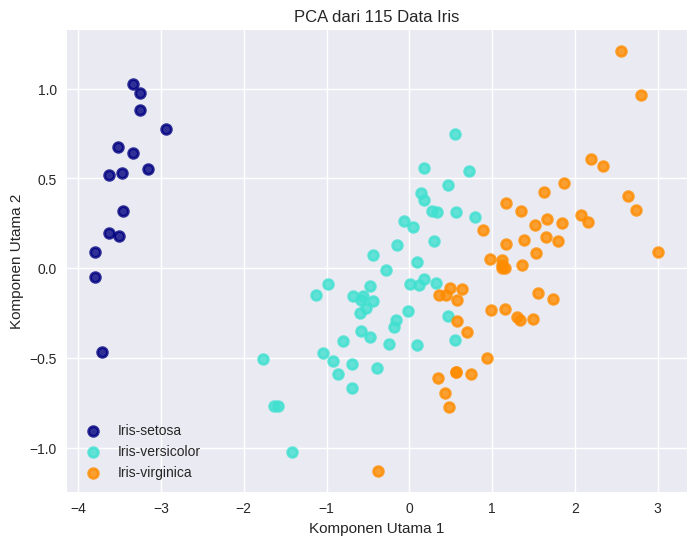

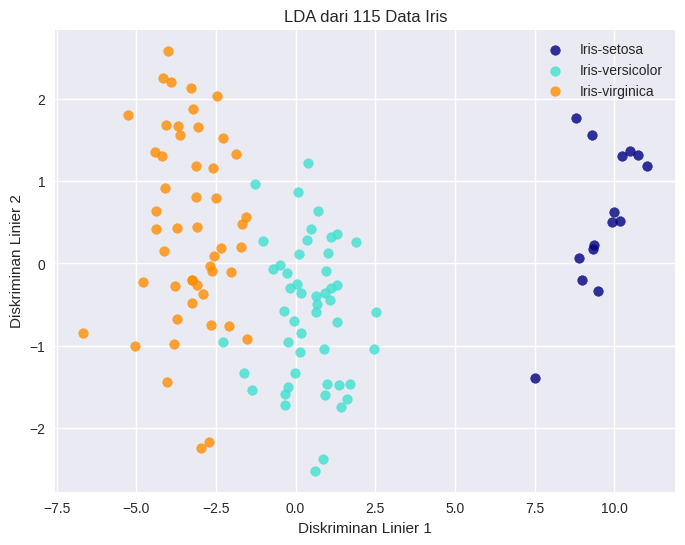

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# --- Langkah 1: Persiapan Data dari DataFrame 'iris_final' Anda ---
# Pastikan DataFrame 'iris_final' sudah ada dari skrip sebelumnya

# A. Pisahkan fitur (X) dan target (y)
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_final[numeric_features].values
y_text = iris_final['class']

# B. Ubah target dari teks menjadi angka (0, 1, 2) karena LDA memerlukannya
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
target_map = {name: i for i, name in enumerate(target_names)}
y = y_text.map(target_map).values


# --- Langkah 2: Terapkan PCA pada 115 Data ---
pca = PCA(n_components=2)
# PCA hanya memerlukan fitur (X)
X_r = pca.fit(X).transform(X)


# --- Langkah 3: Terapkan LDA pada 115 Data ---
lda = LinearDiscriminantAnalysis(n_components=2)
# LDA memerlukan fitur (X) dan target (y) untuk menemukan pemisahan terbaik
X_r2 = lda.fit(X, y).transform(X)

# Cetak persentase varians yang dijelaskan oleh PCA
print(
    "Persentase varians yang dijelaskan oleh PCA (dua komponen pertama): %s"
    % str(pca.explained_variance_ratio_)
)


# --- Langkah 4: Visualisasi Hasil ---
plt.style.use('seaborn-v0_8')
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plot untuk PCA
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA dari 115 Data Iris")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")

# Plot untuk LDA
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA dari 115 Data Iris")
plt.xlabel("Diskriminan Linier 1")
plt.ylabel("Diskriminan Linier 2")

plt.show()

## **Balancing Menggunakan SMOTE**

In [8]:
!pip install imbalanced-learn

In [10]:
import numpy as np
from collections import Counter
# SMOTE
from imblearn.over_sampling import SMOTE

# --- Persiapan ---
# Pastikan variabel X (fitur) dan y (target numerik) sudah ada
# dari skrip analisis PCA/LDA sebelumnya.

# 1. Tampilkan distribusi kelas SEBELUM balancing
print("Distribusi Kelas Sebelum Balancing:")
print(Counter(y))

# 2. Inisialisasi dan terapkan SMOTE
# SMOTE akan membuat sampel baru untuk kelas minoritas (kelas 0: Iris-setosa)
# menggunkan smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. Tampilkan distribusi kelas SETELAH balancing
print("\nDistribusi Kelas Setelah Balancing dengan SMOTE:")
print(Counter(y_resampled))

# 4. Tampilkan perbandingan ukuran dataset
print(f"\nUkuran dataset asli: {X.shape}")
print(f"Ukuran dataset setelah di-resample: {X_resampled.shape}")

Distribusi Kelas Sebelum Balancing:
Counter({np.int64(1): 50, np.int64(2): 50, np.int64(0): 15})

Distribusi Kelas Setelah Balancing dengan SMOTE:
Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})

Ukuran dataset asli: (115, 4)
Ukuran dataset setelah di-resample: (150, 4)


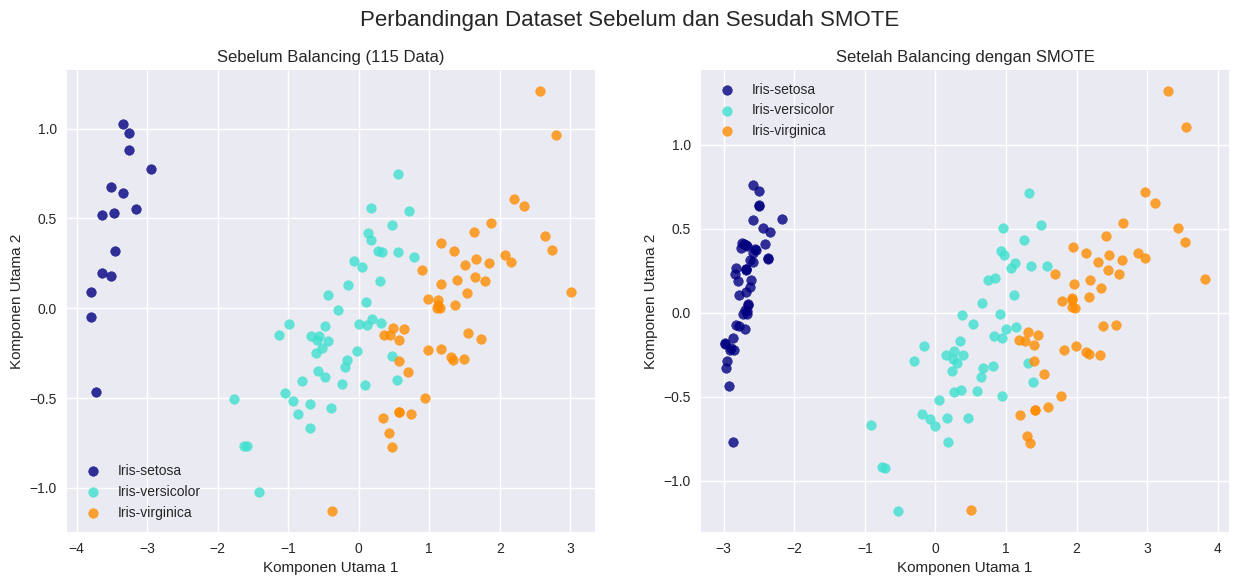

In [13]:
import matplotlib.pyplot as plt

# --- Visualisasi Data SEBELUM Balancing (menggunakan hasil PCA sebelumnya) ---
plt.figure(figsize=(15, 6))
plt.suptitle('Perbandingan Dataset Sebelum dan Sesudah SMOTE', fontsize=16)

# Plot 1: Sebelum ADASYN
plt.subplot(1, 2, 1)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, label=target_name)
plt.title('Sebelum Balancing (115 Data)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()

# --- Visualisasi Data SETELAH Balancing ---
# Kita perlu menjalankan PCA pada data yang sudah di-resample untuk bisa memplotnya
pca_resampled = PCA(n_components=2)
X_r_resampled = pca_resampled.fit(X_resampled).transform(X_resampled)

# Plot 2: Setelah smote
plt.subplot(1, 2, 2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r_resampled[y_resampled == i, 0], X_r_resampled[y_resampled == i, 1],
                color=color, alpha=0.8, label=target_name)
plt.title('Setelah Balancing dengan SMOTE')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()

plt.show()